# Logistic Regression

<br />
<br />
<br />

### Table of Contents

* Introduction
* Loading Dataset
* Logistic Regression Model
* Using a Scaled Model
* Quantitative Assessment with Cross-Validation
* Adding Volume and Interaction Terms

<br />
<br />
<br />

## Introduction

In this notebook, we illustrate the use of Logistic Regression to categorize the abalone shell data set by number of rings. The notebook starts by importing the data as a scikit Bunch object. It then builds a cross-validated Logistic Regression model using a 70/30 split of training and test data, and plots the confusion matrix. 

The results turn out to be pretty dismal. However, we can improve the model quite a bit by utilizing results from prior notebooks. There, we saw that adding a volume variable and normalizing the input variables were all helpful.

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

from sklearn import metrics, cross_validation, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.base import Bunch

import pickle

## Loading Dataset

The function to load the data reads the data from a CSV file, but populates it using a scikit `Bunch` object, which is basically a DataFrame with the inputs and outputs separated.

In [6]:
def load_data():
    
    # Load the data from this file
    data_file = 'abalone/Dataset.data'
    
    # x data labels
    xnlabs = ['Sex']
    xqlabs = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
    xlabs = xnlabs + xqlabs

    # y data labels
    ylabs = ['Rings']

    # Load data to dataframe
    df = pd.read_csv(data_file, header=None, sep=' ', names=xlabs+ylabs)
    
    # Filter zero values of height/length/diameter
    df = df[df['Height']>0.0]
    df = df[df['Length']>0.0]
    df = df[df['Diameter']>0.0]
    
    dummies = pd.get_dummies(df[xnlabs], prefix='Sex')
    
    dfdummies = df[xqlabs+ylabs].join(dummies)
    
    xqlabs = xqlabs + dummies.columns.tolist()
    
    return Bunch(data   = dfdummies[xqlabs],
                 target = df[ylabs],
                 feature_names = xqlabs,
                 target_names  = ylabs)


In [7]:
# Load the dataset
dataset = load_data()
X = dataset.data
y = dataset.target

In [8]:
print X.head()
print "-"*20
print y.head()

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Sex_F  Sex_I  Sex_M  
0         0.150    0.0    0.0    1.0  
1         0.070    0.0    0.0    1.0  
2         0.210    1.0    0.0    0.0  
3         0.155    0.0    0.0    1.0  
4         0.055    0.0    1.0    0.0  
--------------------
   Rings
0     15
1      7
2      9
3     10
4      7


## Logistic Regression Model

Now we can split the data into two parts, a training set and a testing set. We'll use the training set to train the model and fit parameters, and the testing set to assess how well it does. Splitting the inputs and outputs in this way is common when cross-validating a model (for example, to try cutting the data in different places to see if there are significant changes in the fit parameters).

In [9]:
# Split  into a training set and a test set

# 70% train, 30% test
X_train, X_test, y_train, y_test = \
                    cross_validation.train_test_split(X, y, test_size=0.2)

Now we create a logistic regression model, which is predicting abalone age as a categorical variable (the class of 1 ring, the class of 2 rings, and so on.)

In [10]:
# Fit the training data to the model
model = LogisticRegression()
model.fit(X_train, y_train)

print model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Once we've trained the model on the training set, we assess the model with the testing set. If we cut our data into k pieces and repeated this procedure using each of the k cuts as the testing set, and compared the resulting parameters, it would be called k-fold cross validation.

In [11]:
# Make predictions
yhat_test = model.predict(X_test)

In [12]:
# Make sure y_test is a numpy array
y_test = y_test['Rings'].apply(lambda x : int(x)).values

# Compare yhat_test to y_test to determine how well the model did

In [13]:
# This is not usually a good way to assess categorical models,
# but in this case, we're guessing age, so the categories are quantitative.
print model.score(X_test,y_test)

0.243113772455


In [14]:
## Yikes. This model may not be worth saving.
#with open('logistic_regression.pickle', 'w') as f:
#    pickle.dump(model, f)

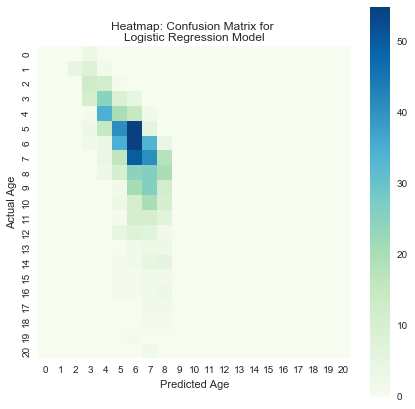

In [15]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
sns.heatmap(metrics.confusion_matrix(y_test, yhat_test),
           cmap="GnBu", square=True, ax=ax)
ax.set_title('Heatmap: Confusion Matrix for \nLogistic Regression Model')
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()

In [16]:
#print metrics.confusion_matrix(y_test, yhat_test)

In [19]:
print metrics.classification_report(y_test, yhat_test)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00        15
          5       0.00      0.00      0.00        26
          6       0.27      0.22      0.24        50
          7       0.35      0.48      0.40        73
          8       0.28      0.34      0.31       120
          9       0.21      0.41      0.28       134
         10       0.22      0.32      0.26       129
         11       0.22      0.24      0.23        84
         12       0.00      0.00      0.00        61
         13       0.00      0.00      0.00        44
         14       0.00      0.00      0.00        30
         15       0.00      0.00      0.00        22
         16       0.00      0.00      0.00         8
         17       0.00      0.00      0.00        14
         18       0.00      0.00      0.00         6
         19       0.00      0.00      0.00         7
         20       0.00      0.00      0.00   

To interpret the above chart: the precision is the ratio of total number of positives in the prediction set to total number of positives in the test set. Most of the abalones have between 7 and 11 rings. For these categories our precision is around 20-30%. This means that 70-80% of the abalones that we put in these categories (i.e., that we guessed have 7-11 rings) actually have a different number of rings.

The reacll of the 7-10 ring categories have a recall of about 40%, which means that 60% of the ablones that should have been in this category are not.

So basically, a _lot_ of miscategorization, with most of it happening for the 7-11 rings categories (which also happen to be the most common).

In [20]:
resid = y_test - yhat_test
print np.mean(resid)
print np.std(resid)

1.0119760479
2.51459934536


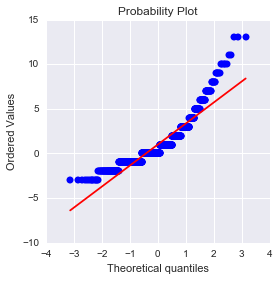

In [21]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
stats.probplot(resid, dist='norm', plot=ax)
plt.show()

## Using a Scaled Model

For our next step we'll compare a scaled model, to see how well that does.

In [22]:
# Split  into a training set and a test set

# 70% train, 30% test
X_train, X_test, y_train, y_test = \
                    cross_validation.train_test_split(X, y, test_size=0.2)

In [23]:
# Repeat above, but with scaled inputs
Xscaler = preprocessing.StandardScaler().fit(X_train)
Xstd_train = Xscaler.transform(X_train)
Xstd_test = Xscaler.transform(X_test)

modelstd = LogisticRegression()
modelstd.fit(Xstd_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Make predictions
yhatstd_test = modelstd.predict(Xstd_test)

y_test = y_test['Rings'].values

In [25]:
# This is not usually a good way to assess categorical models,
# but in this case, we're guessing age, so the categories are quantitative.
print modelstd.score(Xstd_test,y_test)

0.247904191617


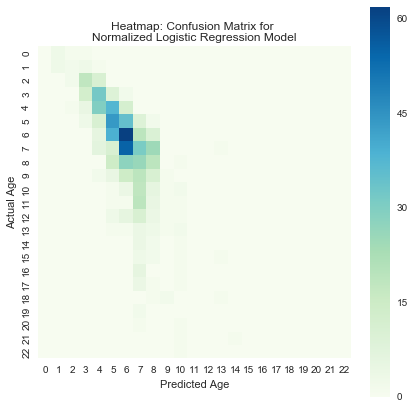

In [26]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
sns.heatmap(metrics.confusion_matrix(y_test, yhatstd_test),
           cmap="GnBu", square=True, ax=ax)
ax.set_title('Heatmap: Confusion Matrix for \nNormalized Logistic Regression Model')
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()

In [27]:
resid = y_test - yhat_test
print np.mean(resid)
print np.std(resid)

1.02275449102
3.65201407227


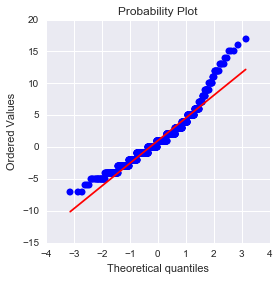

In [28]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
stats.probplot(resid, dist='norm', plot=ax)
plt.show()

This model, like the corresponding unscaled version, is pretty terrible. We're underpredicting abalone age by a substantial amount, and the residuals still have curvature.

## Quantitative Assessment with Cross-Validation

Moving forward, we can try adding a few additional features to our logistic regression model (more input variables, transformed responses, etc.). However, to do that we'll want to be a bit more careful about how we're assessing our models.

Here, we'll implement a k-fold cross validation of our logistic regression parameters, so we can be sure we're not just getting lucky or unlucky with how we cut our data set. To do this with scikit-learn we'll use some of the goodies provided in the [scikit-learn cross-validation documentation](http://scikit-learn.org/stable/modules/cross_validation.html). Namely, we'll build a logistic regression model (which we'll use to fit the data), a shuffle split object (which we'll use to split the data at random into training and test sets), and a pipeline to connect the standard scaler to the logistic regression model.

When we run the `cross_val_score()` method, we'll pass it the pipeline as our "model", and the shuffle split object as our cross-validation object. We'll also pass it our original inputs and outputs, X and y (note that we no longer have to split the data, standardize it, fit the model, compare the predictions, etc etc.). 

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit

In [30]:
# Make a logistic regression model
mod = LogisticRegression()

# Make a ShuffleSplit object to split data into training/testing data sets randomly
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)

# This will be our "model":
# a pipeline that scales our inputs first, 
# then passes them to the logistic regression model
clf = make_pipeline(preprocessing.StandardScaler(), mod)
cross_val_score(clf, X, y, cv=cv)

array([ 0.25937749,  0.24261772,  0.24980048,  0.23942538])

This is a big improvement in workflow, if not in accuracy: we now split the data into training and testing data sets randomly, four different times, and see what the score of each model is. Note that if we want to access the predictions themselves, we can use the `cross_val_predict()` method instead of the `cross_val_score()` method. That will allow us to compute things like a confusion matrix or run a classification report.

## Adding Volume and Interaction Terms

Now that we have a more quantitative way to assess our models, let's start adding in some factors to see if we can improve our logistic regression model.

In [31]:
def load_data_with_volume():
    
    # Load the data from this file
    data_file = 'abalone/Dataset.data'
    
    # x data labels
    xnlabs = ['Sex']
    xqlabs = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
    xlabs = xnlabs + xqlabs

    # y data labels
    ylabs = ['Rings']

    # Load data to dataframe
    df = pd.read_csv(data_file, header=None, sep=' ', names=xlabs+ylabs)
    
    # Filter zero values of height/length/diameter
    df = df[df['Height']>0.0]
    df = df[df['Length']>0.0]
    df = df[df['Diameter']>0.0]
    
    # -----------------------------
    
    # Add volume
    df['Volume'] = df['Height']*df['Length']*df['Diameter']
    xqlabs.append('Volume')
    
    
    # Add dimensions squared
    sq = lambda x : x*x
    df['Height2']   = df['Height'].apply(sq)
    df['Length2']   = df['Length'].apply(sq)
    df['Diameter2'] = df['Diameter'].apply(sq)
    xqlabs.append('Height2')
    xqlabs.append('Length2')
    xqlabs.append('Diameter2')
    
    
    # Add interactions
    df['Height-Length'] = df['Height']*df['Length']
    df['Length-Diameter'] = df['Length']*df['Diameter']
    df['Height-Diameter'] = df['Height']*df['Diameter']

    xqlabs.append('Height-Length')
    xqlabs.append('Length-Diameter')
    xqlabs.append('Height-Diameter')

    # Add dimensions cubed
    cube = lambda x : x*x*x
    df['Height3']   = df['Height'].apply(cube)
    df['Length3']   = df['Length'].apply(cube)
    df['Diameter3'] = df['Diameter'].apply(cube)
    xqlabs.append('Height3')
    xqlabs.append('Length3')
    xqlabs.append('Diameter3')

    # -----------------------------
    
    dummies = pd.get_dummies(df[xnlabs], prefix='Sex')
    
    dfdummies = df[xqlabs+ylabs].join(dummies)
    
    xqlabs = xqlabs + dummies.columns.tolist()
    
    return Bunch(data   = dfdummies[xqlabs],
                 target = df[ylabs],
                 feature_names = xqlabs,
                 target_names  = ylabs)


In [32]:
# Load the dataset
datasetV = load_data_with_volume()
XV = datasetV.data
yV = datasetV.target

In [33]:
# Make a logistic regression model
mod = LogisticRegression()

# Make a ShuffleSplit object to split data into training/testing data sets randomly
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)

# This will be our "model":
# a pipeline that scales our inputs first, 
# then passes them to the logistic regression model
clf = make_pipeline(preprocessing.StandardScaler(), mod)
cross_val_score(clf, XV, yV, cv=cv)

array([ 0.26336792,  0.26097366,  0.25937749,  0.24501197])

Adding higher order variable inputs to our model didn't help much. Although we really didn't explore variable interactions very deeply, it's clear they're only getting us a boost of less than 0.05 in the model score. Let's actually fit the model to data, using the same model and pipeline and data set, but this time use `cross_val_predict()` instead of `cross_val_score()` so we can actually get the predictions from our model.

In [34]:
from sklearn.model_selection import StratifiedKFold

In [35]:
skf = StratifiedKFold(n_splits=4)

In [36]:
print XV.values.shape
#print len(yV.values)
print yV.values.reshape(len(yV.values)).shape

(4175, 20)
(4175,)


In [37]:
# Because this is an array of shape (N,1)
# and we need an array of shape (N,)
# we must reshape it.
yV = yV.values.reshape(len(yV.values))

In [38]:
yhatV = cross_val_predict(clf, XV, yV, cv=skf)

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


In [41]:
print len(yV)
print len(yhatV)

4175
4175


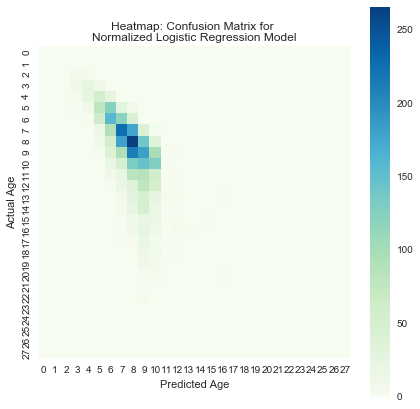

In [42]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
sns.heatmap(metrics.confusion_matrix(yV, yhatV),
           cmap="GnBu", square=True, ax=ax)
ax.set_title('Heatmap: Confusion Matrix for \nNormalized Logistic Regression Model')
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()

## Conclusions

Throwing in the towel here... The logistic model performs very poorly when compared to other techniques like ridge regression or state vector regression, and it'll take a lot of effort, focused on this particular model form, to get it anywhere close to state vector regression.